<a href="https://colab.research.google.com/github/Monica-Restrepo/clases-programacion/blob/main/Visualizacion_datos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python: Matplotlib, Seaborn y Ploty

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/inmigrantes_canada.csv')
df.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.shape

(195, 38)

In [5]:
df.info()

# nno tenemos que tratar los datos, porque no hay regsitros nulos y las variables tienen el tipo adecuado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [6]:
# nos vamoa a enfocar en la tendencia de inmigrantes colombianos a cadana
# modificamos el indice para que se llame pais

df.set_index('Pais', inplace=True)
df.head()

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argelia,África,Norte de África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
# hacemos un filtro para separar los años

anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:
# ahora creamos una variable colombia y con loc nos ayuda a encontrar colombia dentro de la variable anos

colombia = df.loc['Colombia', anos]
colombia

# muestra los años y la cantidad de inmigrantes por año

,Colombia
1980,266
1981,326
1982,360
1983,244
1984,235
1985,214
1986,257
1987,376
1988,352
1989,439


In [9]:
# hay que crear un dataframe con esta información, pero primero vamos a crear un dicicionario

col_dict = {'Año':colombia.index.tolist(),
            'Inmigrantes':colombia.values.tolist()}
col_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(266),
  np.int64(326),
  np.int64(360),
  np.int64(244),
  np.int64(235),
  np.int64(214),
  np.int64(257),
  np.int64(376),
  np.int64(352),
  np.int64(439),
  np.int64(614),
  np.int64(652),
  np.int64(582),
  np.int64(464),
  np.int64(375),
  np.int64(371),
  np.int64(381),
  np.int64(578),
  np.int64(929),
  np.int64(1306),
  np.int64(2259),
  np.int64(2965),
  np.int64(3283),
  np.int64(4318),
  np.int64(4566),
  np.int64(6424),
  np.int64(6535),
  np.int64(5357),
  np.int64(5452),
  np.int64(4652),
  np.int64(5218),
  np.int64(4366),
  np.int64(3741),
  np.int64(3631)]}

In [10]:
# Ahora si creamos el dataframe

datos_col = pd.DataFrame(col_dict)
datos_col.tail()

,Año,Inmigrantes
29,2009,4652
30,2010,5218
31,2011,4366
32,2012,3741
33,2013,3631


In [11]:
import matplotlib.pyplot as plt

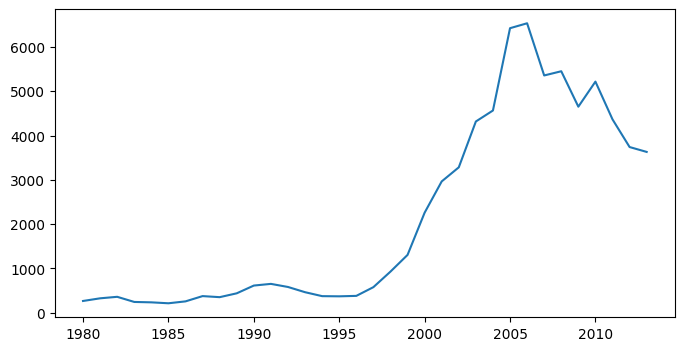

In [14]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.show()

# plot = grafico de linea

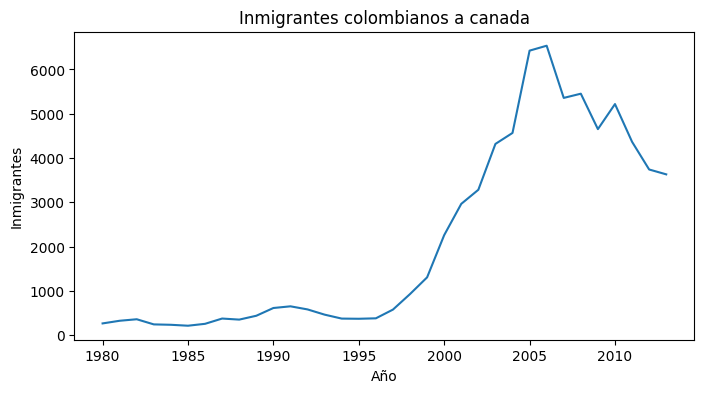

In [15]:
plt.figure(figsize=(8,4))
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.title('Inmigrantes colombianos a canada')
plt.xlabel('Año')
plt.ylabel('Inmigrantes')
plt.show()

In [16]:
argentina = df.loc['Argentina', anos]
argentina

,Argentina
1980,368
1981,426
1982,626
1983,241
1984,237
1985,196
1986,213
1987,519
1988,374
1989,538


In [17]:
arg_dict = {'Año':argentina.index.tolist(),
            'Inmigrantes':argentina.values.tolist()}
arg_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(368),
  np.int64(426),
  np.int64(626),
  np.int64(241),
  np.int64(237),
  np.int64(196),
  np.int64(213),
  np.int64(519),
  np.int64(374),
  np.int64(538),
  np.int64(678),
  np.int64(763),
  np.int64(1023),
  np.int64(1022),
  np.int64(366),
  np.int64(380),
  np.int64(396),
  np.int64(391),
  np.int64(349),
  np.int64(318),
  np.int64(427),
  np.int64(635),
  np.int64(865),
  np.int64(1745),
  np.int64(1591),
  np.int64(1153),
  np.int64(847),
  np.int64(620),
  np.int64(540),
  np.int64(467),
  np.int64(459),
  np.int64(278),
  np.int64(263),
  np.int64(282)]}

In [18]:
datos_arg = pd.DataFrame(arg_dict)
datos_arg.tail()

,Año,Inmigrantes
29,2009,467
30,2010,459
31,2011,278
32,2012,263
33,2013,282


In [19]:
brasil = df.loc['Brasil', anos]
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


In [20]:
bra_dict = {'Año':brasil.index.tolist(),
            'Inmigrantes':brasil.values.tolist()}
bra_dict

{'Año': ['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013'],
 'Inmigrantes': [np.int64(211),
  np.int64(220),
  np.int64(192),
  np.int64(139),
  np.int64(145),
  np.int64(130),
  np.int64(205),
  np.int64(244),
  np.int64(394),
  np.int64(650),
  np.int64(650),
  np.int64(877),
  np.int64(1066),
  np.int64(866),
  np.int64(566),
  np.int64(572),
  np.int64(586),
  np.int64(591),
  np.int64(531),
  np.int64(626),
  np.int64(845),
  np.int64(847),
  np.int64(745),
  np.int64(839),
  np.int64(917),
  np.int64(969),
  np.int64(1181),
  np.int64(1746),
  np.int64(2138),
  np.int64(2509),
  np.int64(2598),
  np.int64(1508),
  np.int64(1642),
  np.int64(1714)]}

In [21]:
datos_bra = pd.DataFrame(bra_dict)
datos_bra.tail()

,Año,Inmigrantes
29,2009,2509
30,2010,2598
31,2011,1508
32,2012,1642
33,2013,1714


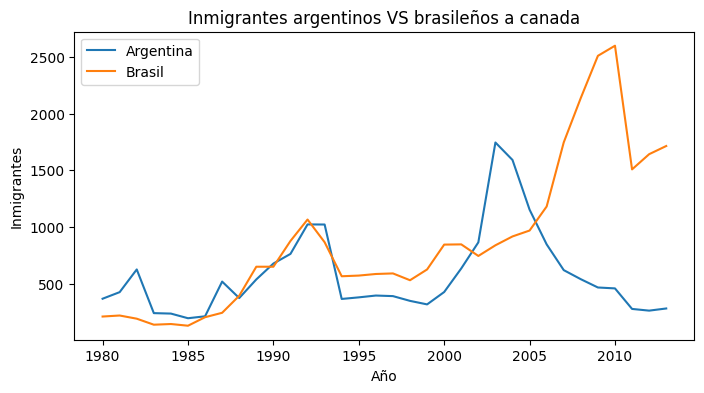

In [25]:
plt.figure(figsize=(8,4))
plt.plot(datos_arg['Año'], datos_arg['Inmigrantes'], label='Argentina')
plt.plot(datos_bra['Año'], datos_bra['Inmigrantes'], label='Brasil')
plt.xticks(['1980','1985','1990','1995','2000','2005','2010'])
plt.title('Inmigrantes argentinos VS brasileños a canada')
plt.xlabel('Año')
plt.ylabel('Inmigrantes')
plt.legend()
plt.show()

In [26]:
# otra forma de hacerlo

df_comparacion = df.loc[['Brasil', 'Argentina'], anos]

In [28]:
# para transponer el dataframe

df_comparacion = df_comparacion.T
df_comparacion.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Pais,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282


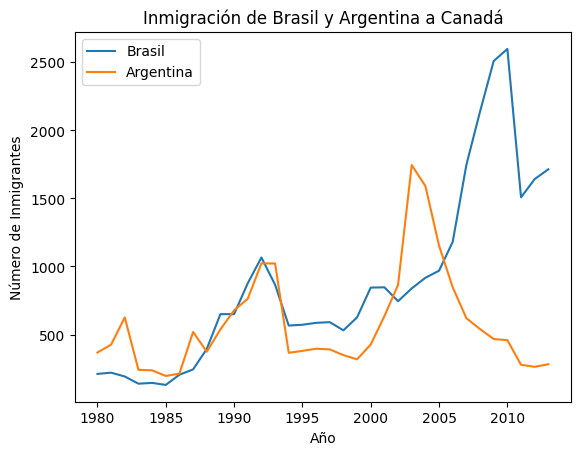

In [32]:
plt.plot(df_comparacion.loc['Brasil'], label='Brasil')
plt.plot(df_comparacion.loc['Argentina'], label='Argentina')
plt.title('Inmigración de Brasil y Argentina a Canadá')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.legend()
plt.show()